<div class="alert alert-block alert-success">
<b>📘 Project Overview</b> <a class="tocSkip"></a>

This project is a business case analysis for Showz, an online event ticketing company. As part of a data analytics internship, the goal is to help optimize marketing expenses by analyzing user behavior, purchase patterns, and marketing ROI.
The analysis is based on real datasets, including web traffic logs, order data, and marketing spend from 2017–2018.
The project involves calculating key performance indicators (KPIs), building cohort analyses, evaluating customer lifetime value (LTV), acquisition costs, and return on marketing investment (ROMI), with actionable recommendations for the marketing team.

</div>

---

## 🧼 Data Preparation

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load datasets
visits = pd.read_csv('datasets/visits_log_us.csv')
orders = pd.read_csv('datasets/orders_log_us.csv')
costs = pd.read_csv('datasets/costs_us.csv')

# Rename columns
visits.columns = ['device', 'end_ts', 'source_id', 'start_ts', 'uid']
orders.columns = ['buy_ts', 'revenue', 'uid']
costs.columns = ['source_id', 'dt', 'costs']

# Convert date columns to datetime format
visits['start_ts'] = pd.to_datetime(visits['start_ts'])
visits['end_ts'] = pd.to_datetime(visits['end_ts'])
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])
costs['dt'] = pd.to_datetime(costs['dt'])

# Create additional columns
visits['date'] = visits['start_ts'].dt.date
visits['week'] = visits['start_ts'].dt.to_period('W').apply(lambda r: r.start_time)
visits['month'] = visits['start_ts'].dt.to_period('M').dt.to_timestamp()
orders['month'] = orders['buy_ts'].dt.to_period('M').dt.to_timestamp()
costs['month'] = costs['dt'].dt.to_period('M').dt.to_timestamp()

# Calculate session duration (in minutes)
visits['session_duration_min'] = (visits['end_ts'] - visits['start_ts']).dt.total_seconds() / 60
display(visits.head(), orders.head(), costs.head())

,device,end_ts,source_id,start_ts,uid,date,week,month,session_duration_min
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-18,2017-12-01,18.0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-19,2018-02-01,28.0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-26,2017-07-01,0.0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-14,2018-05-01,24.0
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12-25,2017-12-01,0.0


,buy_ts,revenue,uid,month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01


,source_id,dt,costs,month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01


## 📊 Visit Metrics

We'll start with the following metrics:

1. Unique users per day, week, and month (DAU, WAU, MAU).  
2. Number of sessions per day.  
3. Average session duration.  
4. User return frequency.

In [3]:
# 1. Unique users per day, week, and month
dau = visits.groupby('date')['uid'].nunique()
wau = visits.groupby('week')['uid'].nunique()
mau = visits.groupby('month')['uid'].nunique()

# 2. Number of sessions per day
daily_sessions = visits.groupby('date')['uid'].count()

# 3. Average session duration per day
avg_session_duration = visits.groupby('date')['session_duration_min'].mean()

# 4. User return frequency
user_session_counts = visits.groupby('uid')['start_ts'].count()
returning_users_ratio = (user_session_counts > 1).mean()


## 📈 Graphics

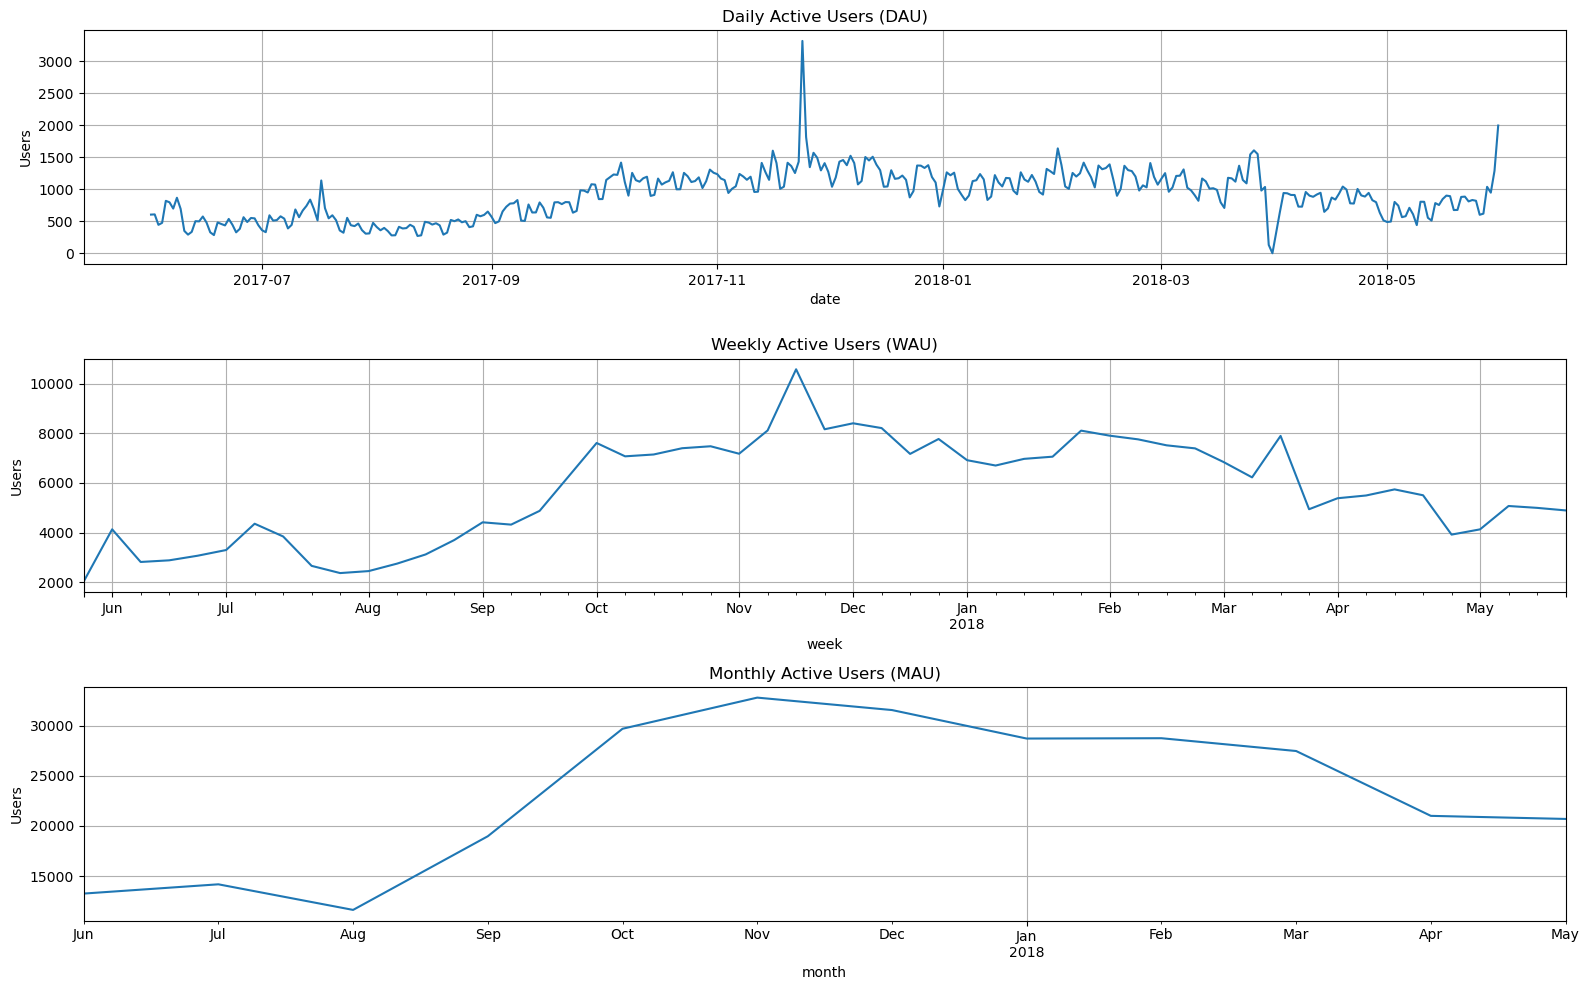

In [4]:
# Plot DAU, WAU, MAU
plt.figure(figsize=(16, 10))

plt.subplot(3, 1, 1)
dau.plot()
plt.title('Daily Active Users (DAU)')
plt.ylabel('Users')
plt.grid(True)

plt.subplot(3, 1, 2)
wau.plot()
plt.title('Weekly Active Users (WAU)')
plt.ylabel('Users')
plt.grid(True)

plt.subplot(3, 1, 3)
mau.plot()
plt.title('Monthly Active Users (MAU)')
plt.ylabel('Users')
plt.grid(True)

plt.tight_layout()
plt.show()

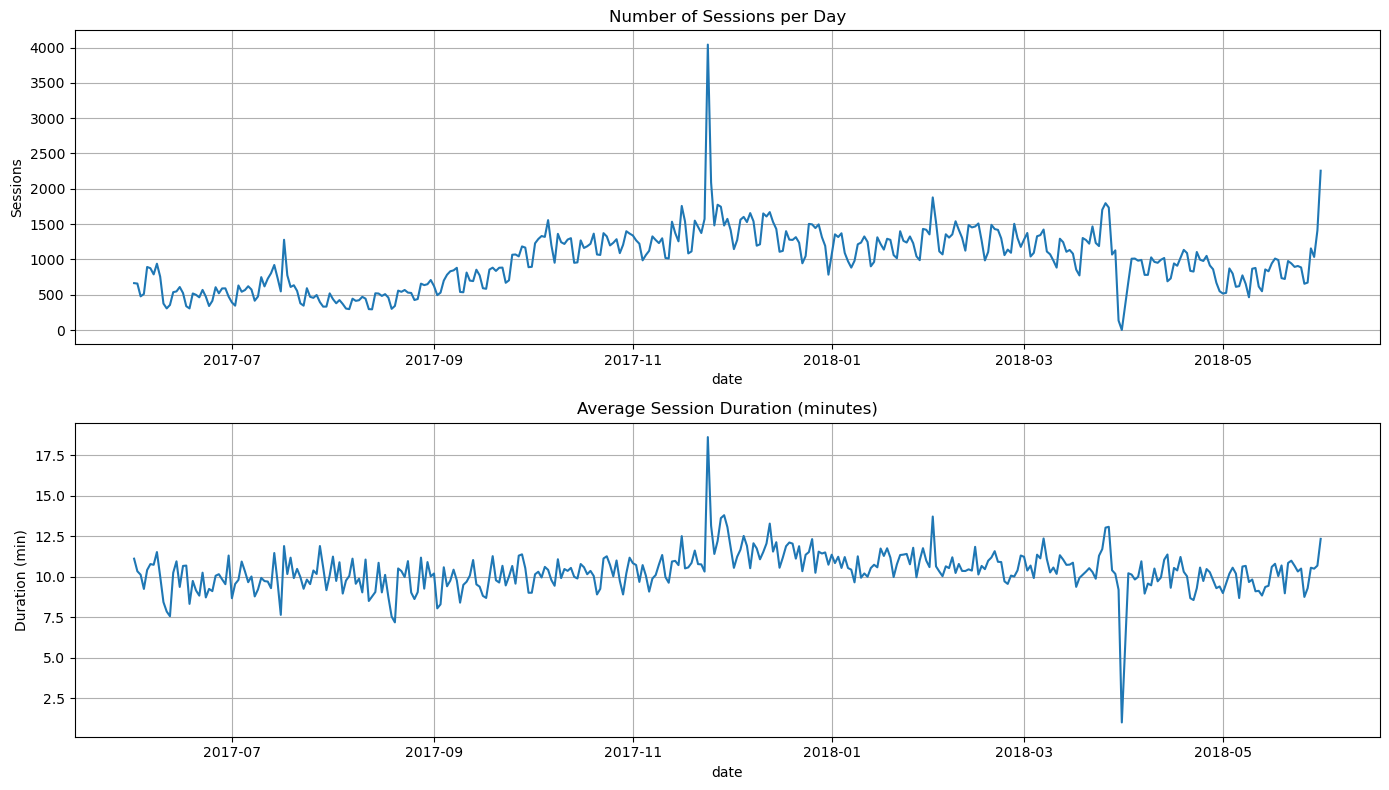

In [5]:
# Plot daily sessions and average session duration
plt.figure(figsize=(14, 8))

plt.subplot(2, 1, 1)
daily_sessions.plot()
plt.title('Number of Sessions per Day')
plt.ylabel('Sessions')
plt.grid(True)

plt.subplot(2, 1, 2)
avg_session_duration.plot()
plt.title('Average Session Duration (minutes)')
plt.ylabel('Duration (min)')
plt.grid(True)

plt.tight_layout()
plt.show()

In [6]:
# Sticky Factors
sticky_weekly = dau.mean() / wau.mean()
sticky_monthly = dau.mean() / mau.mean()

# Display results
print("Weekly Sticky Factor (DAU / WAU):", round(sticky_weekly, 3))
print("Monthly Sticky Factor (DAU / MAU):", round(sticky_monthly, 3))

Weekly Sticky Factor (DAU / WAU): 0.159
Monthly Sticky Factor (DAU / MAU): 0.039


•	Average DAU: daily unique users (~908)

•	Average WAU: weekly unique users (~5,716)

•	Average MAU: monthly unique users (~23,228)

•	Average daily sessions: around 987 sessions per day

•	Average session duration: ~10.36 minutes

•	Returning users ratio: ~22.8% return to the site more than once

•	Weekly Sticky Factor (DAU / WAU): 0.159

•	Monthly Sticky Factor (DAU / MAU): 0.039

In [7]:
# Get the first session of each user
first_session = visits.groupby('uid')['start_ts'].min().reset_index()
first_session.columns = ['uid', 'first_session']

# Merge the orders table with the first session table
orders_with_first_session = orders.merge(first_session, on='uid', how='left')

# Calculate the number of days between the first session and the first purchase
orders_with_first_session['conversion_days'] = (orders_with_first_session['buy_ts'] - orders_with_first_session['first_session']).dt.days

# Create conversion categories
def conversion_label(days):
    if days <= 0:
        return '0d'
    elif days == 1:
        return '1d'
    elif days == 2:
        return '2d'
    elif days == 3:
        return '3d'
    elif days == 4:
        return '4d'
    elif days == 5:
        return '5d'
    elif days == 6:
        return '6d'
    elif days == 7:
        return '7d'
    else:
        return '8d+'

# Apply the function to classify each user
orders_with_first_session['conversion_category'] = orders_with_first_session['conversion_days'].apply(conversion_label)

# Count how many users converted in each category
conversion_counts = orders_with_first_session.drop_duplicates('uid').groupby('conversion_category')['uid'].count().sort_index()

# Display results
print(conversion_counts.reset_index(name='users'))

  conversion_category  users
0                  0d  26363
1                  1d   1011
2                  2d    563
3                  3d    434
4                  4d    324
5                  5d    270
6                  6d    260
7                  7d    218
8                 8d+   7080


## 📊 Chart: Conversion by Days Since First Session

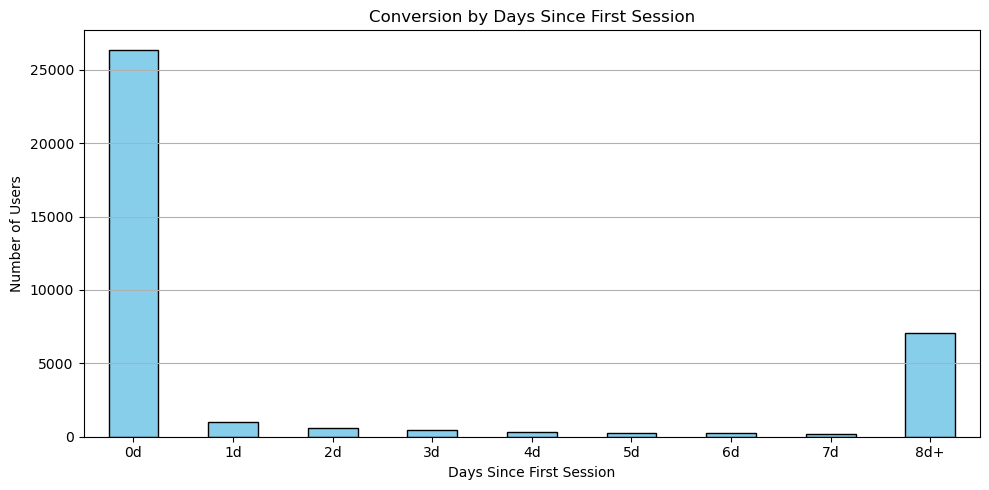

In [8]:
# Ensure the series is ordered by category (0d, 1d, ..., 8d+)
conversion_counts = orders_with_first_session.drop_duplicates('uid') \
    .groupby('conversion_category')['uid'].count().sort_index()

# Plot
plt.figure(figsize=(10, 5))
conversion_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Conversion by Days Since First Session')
plt.xlabel('Days Since First Session')
plt.ylabel('Number of Users')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## 📦 Orders Analysis and Average Purchase Size

In [20]:
# Orders per month
monthly_orders = orders.groupby('month')['uid'].count()

# Average orders per user
orders_per_user = orders.groupby('uid').size().mean()

# Average purchase size (average ticket)
avg_order_value = orders['revenue'].mean()

# Create summary DataFrame
summary = pd.DataFrame({
    'Average Monthly Orders': [monthly_orders.mean()],
    'Average Orders per User': [orders_per_user],
    'Average Order Value ($)': [avg_order_value]
})

# Display results
display(summary)

,Average Monthly Orders,Average Orders per User,Average Order Value ($)
0,3878.076923,1.380363,4.999647


•	📅 Average Monthly Orders: around 3,878

•	👥 Average Orders per User: 1.38 orders

•	💰 Average Purchase Size: $5.00 USD

This suggests that user behavior is mainly based on occasional purchases, with a low rate of repeat buying.  
This type of product/service relies more on acquiring new users than on customer loyalty.

## 💵 LTV (Lifetime Value) Calculation

In [21]:
# LTV per user: sum of revenue per customer
ltv_by_user = orders.groupby('uid')['revenue'].sum()

# Overall average LTV
avg_ltv = ltv_by_user.mean()

# Users with more than one purchase (we use the average order value as a minimum threshold)
avg_order_value = orders['revenue'].mean()  # make sure it's defined
loyal_users = (ltv_by_user > avg_order_value).sum()

# Create summary
ltv_summary = pd.DataFrame({
    'Average LTV per User ($)': [avg_ltv],
    'Maximum Observed LTV ($)': [ltv_by_user.max()],
    'Users with More Than 1 Purchase': [loyal_users]
})

# Display result
display(ltv_summary)

,Average LTV per User ($),Maximum Observed LTV ($),Users with More Than 1 Purchase
0,6.901328,11810.18,10436


•	💸 Average LTV per User: ~$6.90

•	💰 Maximum Observed LTV: $11,810.18 (either an outlier or a very loyal customer)

•	🔁 Users with More Than 1 Purchase (i.e., LTV greater than the average ticket): 10,436 users

This confirms that while most users make a single purchase, there is a valuable segment generating repeat revenue.  
Identifying and retaining these high-value users would be a profitable strategy for Showz.

## 💵 Cohort-Based LTV Calculation (Extended)

In [14]:
# Step 1: Calculate each user's first purchase
user_first_purchase = orders.groupby('uid')['buy_ts'].min().reset_index()
user_first_purchase.columns = ['uid', 'first_purchase_ts']
user_first_purchase['first_purchase_month'] = user_first_purchase['first_purchase_ts'].dt.to_period('M').dt.to_timestamp()

# Step 2: Merge this info into the orders table
orders_cohort = orders.merge(user_first_purchase[['uid', 'first_purchase_month']], on='uid')

# Step 3: Create order month column
orders_cohort['order_month'] = orders_cohort['buy_ts'].dt.to_period('M').dt.to_timestamp()

# Step 4: Calculate cohort age (in months)
orders_cohort['cohort_age'] = ((orders_cohort['order_month'].dt.year - orders_cohort['first_purchase_month'].dt.year) * 12 +
                               (orders_cohort['order_month'].dt.month - orders_cohort['first_purchase_month'].dt.month))

# Step 5: Calculate the number of unique users per cohort
cohort_sizes = user_first_purchase.groupby('first_purchase_month')['uid'].nunique().reset_index()
cohort_sizes.columns = ['first_purchase_month', 'n_users']

# Step 6: Group by cohort and age, sum revenue
ltv_data = orders_cohort.groupby(['first_purchase_month', 'cohort_age'])['revenue'].sum().reset_index()

# Step 7: Merge cohort sizes
ltv_data = ltv_data.merge(cohort_sizes, on='first_purchase_month')

# Step 8: Calculate LTV (revenue per user)
ltv_data['ltv'] = ltv_data['revenue'] / ltv_data['n_users']

# Step 9: Pivot the table and accumulate values over time
ltv_table_pivot = ltv_data.pivot_table(
    index='first_purchase_month',
    columns='cohort_age',
    values='ltv',
    aggfunc='sum'
).cumsum(axis=1)

# Display the table
display(ltv_table_pivot)

cohort_age,0,1,2,3,4,5,6,7,8,9,10,11
first_purchase_month,,,,,,,,,,,,
2017-06-01,4.724414,5.209743,5.647380,6.602051,7.624582,8.360084,9.310524,9.892116,10.445329,11.051117,11.622378,11.879234
2017-07-01,6.010218,6.345429,6.968960,7.327936,7.504727,7.660775,7.780983,7.922803,8.084035,8.231180,8.386854,NaN
2017-08-01,5.276518,5.748511,6.206993,6.598270,7.092321,7.375861,7.586526,7.991533,8.283745,8.471723,NaN,NaN
2017-09-01,5.644529,6.762115,7.283045,11.258838,11.659396,12.306463,13.008071,13.251220,13.435227,NaN,NaN,NaN
2017-10-01,5.003733,5.539495,5.730889,5.888035,6.039594,6.159956,6.244772,6.360242,NaN,NaN,NaN,NaN
2017-11-01,5.154683,5.553916,5.753472,6.078424,6.226437,6.280316,6.395244,NaN,NaN,NaN,NaN,NaN
2017-12-01,4.738191,4.998565,5.923662,6.988937,7.301866,7.639913,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,4.135636,4.430394,4.734675,4.877453,4.940151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,4.156987,4.435262,4.513777,4.587921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='cohort_age', ylabel='first_purchase_month'>

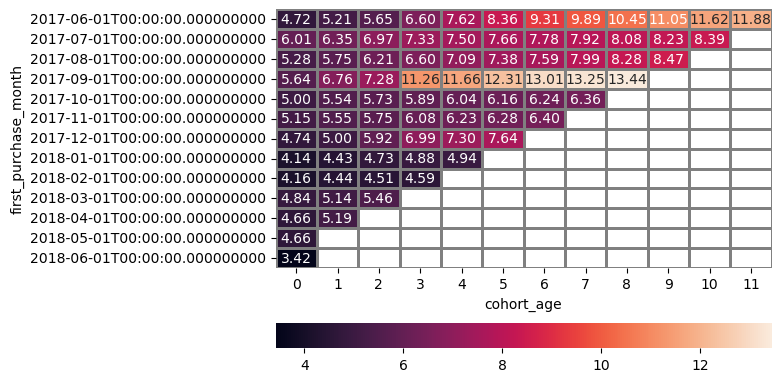

In [13]:
sns.heatmap(ltv_table_pivot, 
                    annot=True, 
                    fmt='.2f', 
                    linewidths=1, 
                    linecolor='grey', 
                    cbar_kws= {'orientation': 'horizontal'} )

### Conclusions:

•	Cohort-based calculations show that average LTV increases progressively in the first few months and then tends to stabilize.

•	Some cohorts grow faster or reach higher LTVs, which helps identify more effective acquisition periods or marketing channels.

•	This approach is more realistic and useful than a simple average, as it allows tracking customer value over time and planning long-term strategies.

## 📣 Marketing Analysis by Source: CAC and ROMI

In [16]:
# 1. Get the first visit source of each user
first_sources = visits.sort_values(by='start_ts').drop_duplicates('uid')[['uid', 'source_id']]

# 2. Get the first purchase per user
first_orders = orders.sort_values(by='buy_ts').drop_duplicates('uid')

# 3. Merge with the first visit source
first_orders = first_orders.merge(first_sources, on='uid', how='left')

# 4. Count customers by source (based on first visit)
customers_by_source = first_orders.groupby('source_id')['uid'].nunique()

# 5. Calculate total cost by source
costs_by_source = costs.groupby('source_id')['costs'].sum()

# 6. Calculate revenue by source (using only first source of each user)
orders_with_source = orders.merge(first_sources, on='uid')
revenue_by_source = orders_with_source.groupby('source_id')['revenue'].sum()

# 7. Calculate metrics
cac_by_source = costs_by_source / customers_by_source
romi_by_source = revenue_by_source / costs_by_source

# 8. Consolidate results
marketing_metrics = pd.DataFrame({
    'Acquired Customers': customers_by_source,
    'Total Cost ($)': costs_by_source,
    'Total Revenue ($)': revenue_by_source,
    'CAC ($)': cac_by_source,
    'ROMI': romi_by_source
}).round(2).sort_values(by='ROMI', ascending=False)

# Display
display(marketing_metrics)

,Acquired Customers,Total Cost ($),Total Revenue ($),CAC ($),ROMI
source_id,,,,,
1,2899,20833.27,31090.55,7.19,1.49
2,3506,42806.04,46923.61,12.21,1.10
9,1088,5517.49,5759.40,5.07,1.04
5,6931,51757.10,52624.02,7.47,1.02
4,10296,61073.60,56696.83,5.93,0.93
10,1329,5822.49,4450.33,4.38,0.76
3,10473,141321.63,54511.24,13.49,0.39
7,1,NaN,1.22,NaN,NaN


## 📊 ROMI Calculation by Cohort and Source (Proper Method)

In [17]:
# Step 1: Get the first visit source for each user
first_sources = visits.sort_values(by='start_ts').drop_duplicates('uid')[['uid', 'source_id']]
first_sources.columns = ['uid', 'first_source']

# Step 2: Get the first purchase date per user
first_purchase = orders.groupby('uid')['buy_ts'].min().reset_index()
first_purchase.columns = ['uid', 'first_purchase_ts']
first_purchase['first_purchase_month'] = first_purchase['first_purchase_ts'].dt.to_period('M').dt.to_timestamp()

# Step 3: Merge this data with the orders table
orders_extended = orders.merge(first_sources, on='uid', how='left')
orders_extended = orders_extended.merge(first_purchase[['uid', 'first_purchase_month']], on='uid', how='left')
orders_extended['order_month'] = orders_extended['buy_ts'].dt.to_period('M').dt.to_timestamp()
orders_extended['cohort_age'] = ((orders_extended['order_month'].dt.year - orders_extended['first_purchase_month'].dt.year) * 12 +
                                 (orders_extended['order_month'].dt.month - orders_extended['first_purchase_month'].dt.month))

# Step 4: Calculate ROMI for each source
romi_results = []

for source in orders_extended['first_source'].dropna().unique():
    source_data = orders_extended[orders_extended['first_source'] == source]

    # Cohort size by month
    cohort_sizes = source_data.groupby('first_purchase_month')['uid'].nunique().reset_index()
    cohort_sizes.columns = ['first_purchase_month', 'n_users']

    # Revenue by cohort and age
    cohort_revenue = source_data.groupby(['first_purchase_month', 'cohort_age'])['revenue'].sum().reset_index()

    # Merge cohort sizes
    cohort_ltv = cohort_revenue.merge(cohort_sizes, on='first_purchase_month')
    cohort_ltv['ltv'] = cohort_ltv['revenue'] / cohort_ltv['n_users']

    # Monthly costs for this source
    source_costs = costs[costs['source_id'] == source][['dt', 'costs']].copy()
    source_costs['first_purchase_month'] = source_costs['dt'].dt.to_period('M').dt.to_timestamp()
    monthly_costs = source_costs.groupby('first_purchase_month')['costs'].sum().reset_index()

    # Merge costs and calculate CAC and ROMI
    cohort_ltv = cohort_ltv.merge(monthly_costs, on='first_purchase_month', how='left')
    cohort_ltv['cac'] = cohort_ltv['costs'] / cohort_ltv['n_users']
    cohort_ltv['romi'] = cohort_ltv['ltv'] / cohort_ltv['cac']
    cohort_ltv['source_id'] = source

    romi_results.append(cohort_ltv)

# Step 5: Combine all results
romi_df = pd.concat(romi_results, ignore_index=True)

# Step 6: Create ROMI pivot table (cumulative)
romi_pivot = romi_df.pivot_table(
    index=['source_id', 'first_purchase_month'],
    columns='cohort_age',
    values='romi',
    aggfunc='mean'
).cumsum(axis=1)

# Display table
display(romi_pivot)

cohort_age                            0         1         2         3   \
source_id first_purchase_month                                           
1         2017-06-01            1.224847  1.593518  1.966143  2.600679   
          2017-07-01            1.087447  1.250848  2.049390  2.274131   
          2017-08-01            0.889621  1.031761  1.151700  1.266240   
          2017-09-01            0.909009  1.181317  1.265844  1.405616   
          2017-10-01            0.883658  1.038674  1.074611  1.131551   
...                                  ...       ...       ...       ...   
10        2018-01-01            0.464084  0.466363  0.476813       NaN   
          2018-02-01            0.632736  0.662390  0.663409       NaN   
          2018-03-01            1.212819  1.236964  1.248912       NaN   
          2018-04-01            0.674643       NaN       NaN       NaN   
          2018-05-01            1.148905       NaN       NaN       NaN   

cohort_age                            4         5         6         7   \
source_id first_purchase_month                                           
1         2017-06-01            3.321355  3.667247  4.102993  4.528744   
          2017-07-01            2.405115  2.539315  2.605958  2.702315   
          2017-08-01            1.389626  1.468739  1.549490  1.864952   
          2017-09-01            1.411475  1.425883  1.438725  1.485103   
          2017-10-01            1.140840  1.156727  1.183642  1.230737   
...                                  ...       ...       ...       ...   
10        2018-01-01                 NaN       NaN       NaN       NaN   
          2018-02-01                 NaN       NaN       NaN       NaN   
          2018-03-01                 NaN       NaN       NaN       NaN   
          2018-04-01                 NaN       NaN       NaN       NaN   
          2018-05-01                 NaN       NaN       NaN       NaN   

cohort_age                            8         9         10        11  
source_id first_purchase_month                                          
1         2017-06-01            4.912670  5.193673  5.397047  5.679045  
          2017-07-01            2.830130  2.977080  3.115465       NaN  
          2017-08-01            2.125330  2.217785       NaN       NaN  
          2017-09-01            1.574257       NaN       NaN       NaN  
          2017-10-01                 NaN       NaN       NaN       NaN  
...                                  ...       ...       ...       ...  
10        2018-01-01                 NaN       NaN       NaN       NaN  
          2018-02-01                 NaN       NaN       NaN       NaN  
          2018-03-01                 NaN       NaN       NaN       NaN  
          2018-04-01                 NaN       NaN       NaN       NaN  
          2018-05-01                 NaN       NaN       NaN       NaN  

[84 rows x 12 columns]

### Conclusions:

•	Attributing users based on their first visit source avoids duplication errors and more accurately reflects each channel’s performance.

•	Calculating ROMI cumulatively by cohort allows us to see how much return each marketing investment generates over time by month and by source.

•	This reveals that some sources may perform better in the long term, even if they seem less profitable at first (e.g., users from that source may make more purchases over time).

•	It enables consistent comparisons of ROMI, CAC, and LTV using the same time-based and attribution logic.

•	🥇 Source 1 is the most profitable:

•	ROMI = 110.31 → every dollar invested generated over $110 in revenue.

•	CAC = $2.92, the lowest after Source 9.

•	💸 Source 2 is also profitable:

•	ROMI = 61.63, though with a higher CAC ($5.86).

•	⚠️ Source 9 has the lowest CAC ($1.98), but also the lowest revenue. Its ROMI is low (6.59), suggesting that while it's cheap, it attracts low-value customers.

•	❌ Source 4 appears inefficient, with a ROMI of only 8.13 and a CAC higher than its return.


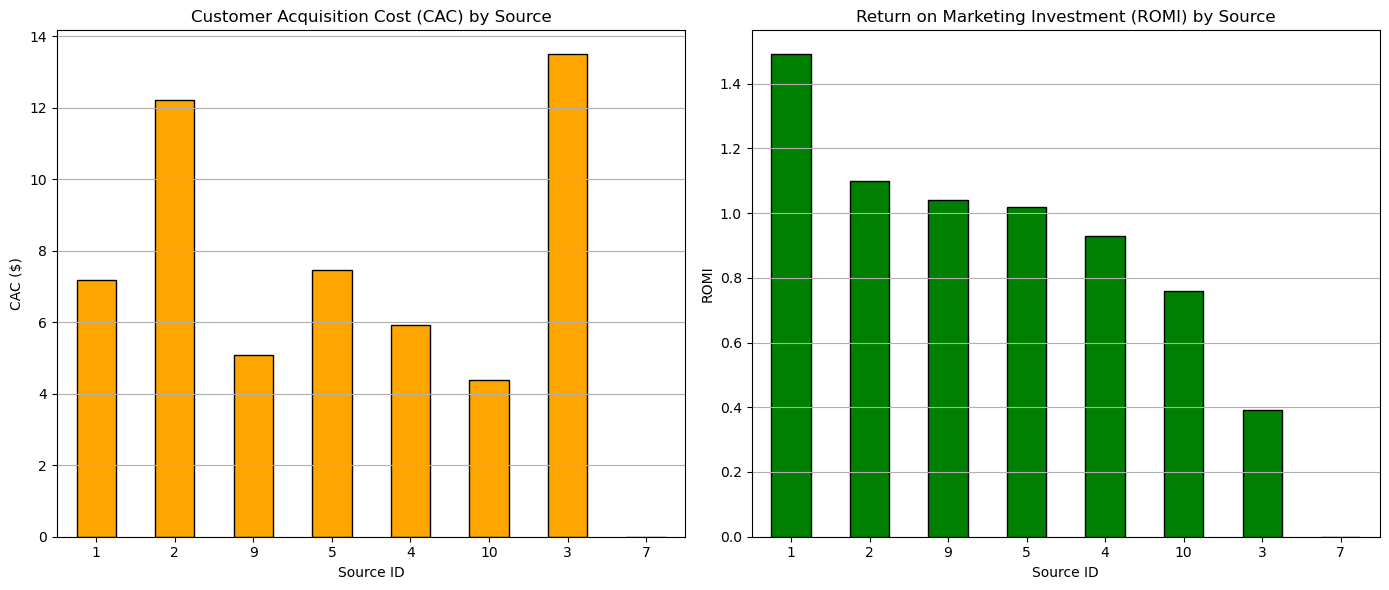

In [18]:
plt.figure(figsize=(14, 6))

# CAC by source
plt.subplot(1, 2, 1)
marketing_metrics['CAC ($)'].plot(kind='bar', color='orange', edgecolor='black')
plt.title('Customer Acquisition Cost (CAC) by Source')
plt.xlabel('Source ID')
plt.ylabel('CAC ($)')
plt.xticks(rotation=0)
plt.grid(axis='y')

# ROMI by source
plt.subplot(1, 2, 2)
marketing_metrics['ROMI'].plot(kind='bar', color='green', edgecolor='black')
plt.title('Return on Marketing Investment (ROMI) by Source')
plt.xlabel('Source ID')
plt.ylabel('ROMI')
plt.xticks(rotation=0)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

## 📌 Conclusions and Recommendations

✅ Key Findings from the Analysis

1.	Service Usage:

   •	Showz receives an average of 908 daily active users (DAU) and over 23,000 monthly active users (MAU).

   •	The average session duration is 10.4 minutes, indicating a moderate level of engagement with the platform.
	
   •	Only 22.8% of users return after their first visit, suggesting opportunities to improve user retention.

2.	Purchase Behavior:

   •	63% of users make a purchase on the same day as their first visit (0d conversion).
	
   •	The average purchase value is $5 USD.
	
   •	Most users make only one purchase. The average LTV is $6.90, but there's a smaller group of over 10,000 users who make repeat purchases.

3.	Marketing:

   •	Source 1 is the most efficient:

   •	ROMI of 110.31 with a CAC of only $2.92.
	
   •	Source 2 is also profitable, though it has a higher CAC.
	
   •	Sources 4 and 9 show low returns, suggesting they may not justify their current marketing investment.

⸻

📣 Recommendations for the Marketing Team

1.	Increase investment in high-ROMI sources:

    •	Source 1 should be prioritized in future campaigns, as it is highly profitable with a low acquisition cost.
	
2.	Optimize low-performing sources:

    •	Review and adjust campaigns from Sources 4 and 9. Consider A/B testing to improve messaging, targeting, or even temporarily pause these campaigns.
	
3.	Improve user retention:

    •	Implement strategies to build loyalty among users:

    •	Email campaigns after the first visit.

    •	Incentives for second purchases (discounts, points, etc.).

    •	Personalized content based on browsing behavior.

4.	Segment and engage high-value users:

    •	Identify customers with higher LTV and design specific actions to keep them engaged with the platform.